In [60]:
a=5
a

5

In [61]:
import pandas as pd 
import numpy as np 
import tensorflow as tf

import matplotlib.pyplot as plt 
import seaborn as sns 
import matplotlib.image as mpimg

from sklearn.model_selection import train_test_split 

from tensorflow.keras.utils import to_categorical 

from tensorflow.keras.preprocessing import image 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.models import *
from tensorflow.keras.layers import *

from tensorflow.keras.optimizers import Adam


In [62]:
dataset=pd.read_csv(r"C:\Users\HP PC\Downloads\archive (12)\fer2013.csv")
dataset

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
...,...,...,...
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest


In [63]:
a=5
a

5

C:\Users\HP PC\AppData\Local\Temp\ipykernel_7864\870180081.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=emotion_name,y=emotion_count,palette="viridis",ax=ax)


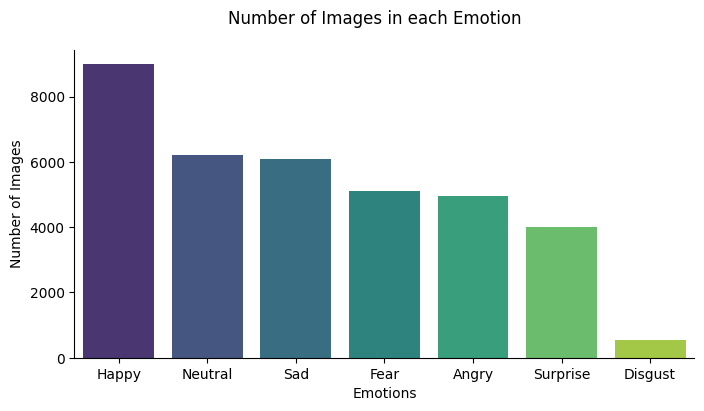

In [64]:
#Classes: 0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral
emotion_mapping = {
    0: 'Angry',
    1: 'Disgust',
    2: 'Fear',
    3: 'Happy',
    4: 'Sad',
    5: 'Surprise',
    6: 'Neutral'
}

# We  have the emotion_mapping dictionary
emotion_counts = dataset.emotion.value_counts()

# Access emotion counts with corresponding names
emotion_name = [emotion_mapping[label] for label in emotion_counts.index]
emotion_count = [count for count in emotion_counts.values]

# Create a bar plot using Matplotlib & Seaborn
fig, ax = plt.subplots(1,1,figsize=(8,4))
#sns.barplot(x=data.emotion.value_counts().keys() ,y=data.emotion.value_counts().values,palette="viridis",ax=ax)
sns.barplot(x=emotion_name,y=emotion_count,palette="viridis",ax=ax)
plt.xlabel("Emotions")
plt.ylabel("Number of Images")
ax.spines['top'].set_visible(False) # it will remove the top boundry line
ax.spines['right'].set_visible(False) # it will remove the right boundry line
fig.suptitle("Number of Images in each Emotion")
plt.show()

In [65]:
Classes=dataset["emotion"]
Classes

0        0
1        0
2        2
3        4
4        6
        ..
35882    6
35883    3
35884    0
35885    3
35886    2
Name: emotion, Length: 35887, dtype: int64

In [66]:
pixels = dataset["pixels"]

# Split the strings into lists of integers
pixels = pixels.apply(lambda x: np.fromstring(x, sep=' ', dtype=np.uint8))

# Convert the list of arrays into a 2D NumPy array of shape (35000, 48*48)
pixels = np.stack(pixels.values)

# Reshape into (35000, 48, 48) for image representation
pixels = pixels.reshape(-1, 48, 48)

In [67]:

pixels


array([[[ 70,  80,  82, ...,  52,  43,  41],
        [ 65,  61,  58, ...,  56,  52,  44],
        [ 50,  43,  54, ...,  49,  56,  47],
        ...,
        [ 91,  65,  42, ...,  72,  56,  43],
        [ 77,  82,  79, ..., 105,  70,  46],
        [ 77,  72,  84, ..., 106, 109,  82]],

       [[151, 150, 147, ..., 129, 140, 120],
        [151, 149, 149, ..., 122, 141, 137],
        [151, 151, 156, ..., 109, 123, 146],
        ...,
        [188, 188, 121, ..., 185, 185, 186],
        [188, 187, 196, ..., 186, 182, 187],
        [186, 184, 185, ..., 193, 183, 184]],

       [[231, 212, 156, ...,  44,  27,  16],
        [229, 175, 148, ...,  27,  35,  27],
        [214, 156, 157, ...,  28,  22,  28],
        ...,
        [241, 245, 250, ...,  57, 101, 146],
        [246, 250, 252, ...,  78, 105, 162],
        [250, 251, 250, ...,  88, 110, 152]],

       ...,

       [[ 17,  17,  16, ...,  83, 114, 245],
        [ 18,  17,  16, ..., 104, 136, 253],
        [ 19,  16,  17, ..., 128, 152, 255

In [68]:
#scaling pixels
pixels=pixels/255
pixels

array([[[0.2745098 , 0.31372549, 0.32156863, ..., 0.20392157,
         0.16862745, 0.16078431],
        [0.25490196, 0.23921569, 0.22745098, ..., 0.21960784,
         0.20392157, 0.17254902],
        [0.19607843, 0.16862745, 0.21176471, ..., 0.19215686,
         0.21960784, 0.18431373],
        ...,
        [0.35686275, 0.25490196, 0.16470588, ..., 0.28235294,
         0.21960784, 0.16862745],
        [0.30196078, 0.32156863, 0.30980392, ..., 0.41176471,
         0.2745098 , 0.18039216],
        [0.30196078, 0.28235294, 0.32941176, ..., 0.41568627,
         0.42745098, 0.32156863]],

       [[0.59215686, 0.58823529, 0.57647059, ..., 0.50588235,
         0.54901961, 0.47058824],
        [0.59215686, 0.58431373, 0.58431373, ..., 0.47843137,
         0.55294118, 0.5372549 ],
        [0.59215686, 0.59215686, 0.61176471, ..., 0.42745098,
         0.48235294, 0.57254902],
        ...,
        [0.7372549 , 0.7372549 , 0.4745098 , ..., 0.7254902 ,
         0.7254902 , 0.72941176],
        [0.7

In [69]:
pixels=pixels.reshape(-1,48,48,1)
pixels.shape

(35887, 48, 48, 1)

In [70]:
X_train, X_test, y_train, y_test = train_test_split(pixels, Classes, test_size=0.1, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, shuffle=False)

In [71]:
X_train.shape

(29068, 48, 48, 1)

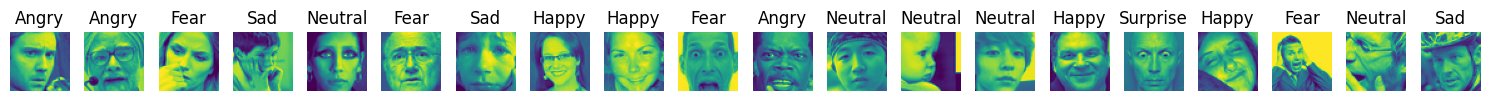

In [73]:
plt.figure(figsize=(15, 23))
for i in range(20):
    img = np.squeeze(X_train[i])  # Squeeze to remove any extra dimensions
    plt.subplot(1, 20, i + 1)
    plt.imshow(img)  
    label = y_train[i]  # Since y_train has integer values like 3 (not one-hot encoded)
    plt.title(emotion_mapping[label]) 
    plt.axis('off')  # Turn off axis numbers
plt.tight_layout()
plt.show()

In [74]:
train_datagen=ImageDataGenerator( width_shift_range = 0.1, #shift the image width by 10%
                                 height_shift_range = 0.1, #shift the image height by 10%
                                 horizontal_flip = True, #flip the image horizontally
                                 zoom_range = 0.2) #zoom the images by 20%


valgen = ImageDataGenerator( width_shift_range = 0.1, #shift the image width by 10%
                               height_shift_range = 0.1, #shift the image height by 10%
                               horizontal_flip = True, #shift the image height by 10%
                               zoom_range = 0.2) #zoom the images by 20%
train_datagen.fit(X_train)
valgen.fit(X_val)

In [75]:
train_generator = train_datagen.flow(X_train, y_train, batch_size=64)
validation_generator = valgen.flow(X_val, y_val, batch_size=64)

<function matplotlib.pyplot.show(close=None, block=None)>

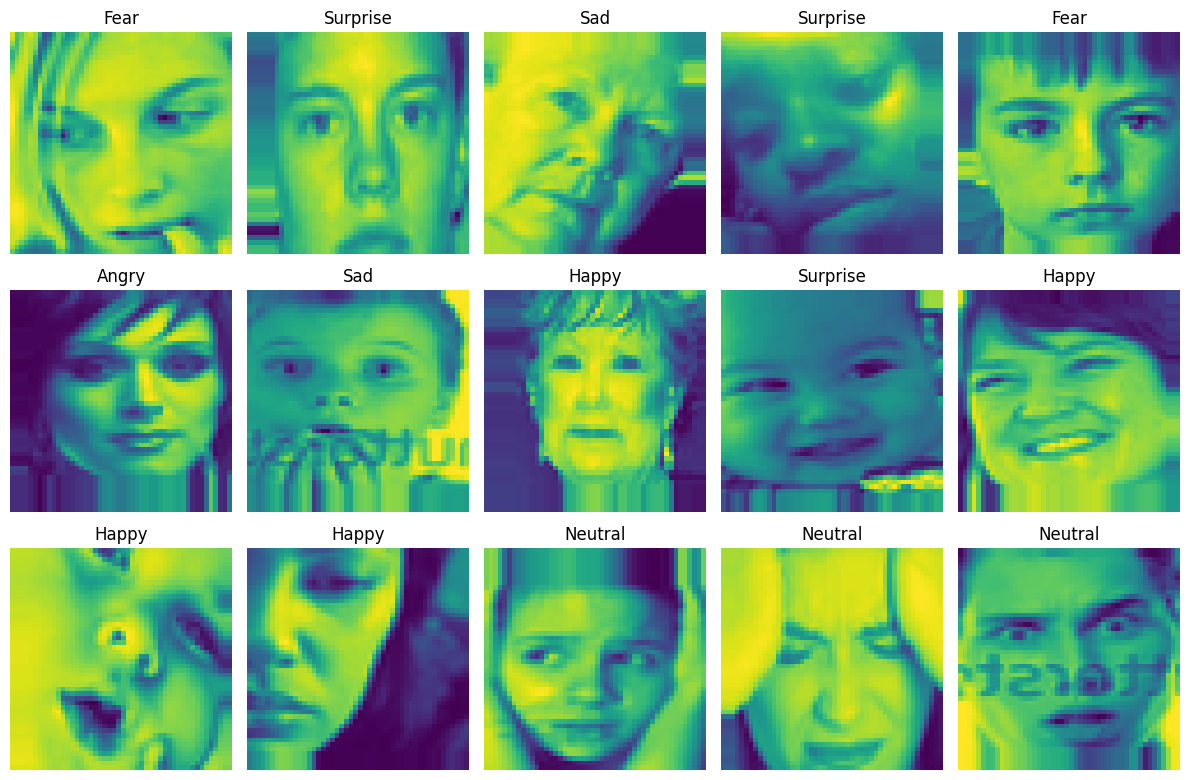

In [76]:
plt.figure(figsize=(12,8))
for i in range(0,15):
  plt.subplot(3,5,i+1)
  for X_batch , Y_batch in train_generator:
    images = X_batch[0]
    plt.imshow(images)
    index = Y_batch[i]
    plt.title(emotion_mapping[index])
    plt.axis('off') # turn off the axis numbering
    break
plt.tight_layout()
plt.show

In [77]:
input_shape=(48,48,1)

inputs=Input(input_shape)
x = Conv2D(256, (3, 3), activation='relu', padding='same')(inputs)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x=Conv2D(64, (3,3), activation="relu", padding='same')(x)
x=MaxPooling2D((2,2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)

x=Flatten()(x)
outputs=Dense(units=7,activation="linear")(x)



In [78]:
My_model=Model(inputs=inputs,outputs=outputs)

In [79]:
My_model.compile(optimizer="Adam",loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
My_model.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)           │ (None, 48, 48, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_117 (Conv2D)                  │ (None, 48, 48, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_118 (Conv2D)                  │ (None, 24, 24, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 7)                   │          64,519 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 69,463 (271.34 KB)

 Trainable params: 69,463 (271.34 KB)

 Non-trainable params: 0 (0.00 B)

In [80]:
My_model.fit(
    train_generator,             # Training data generator
    epochs=20,                 # Number of epochs
    
    validation_data=validation_generator,   # Validation data generator
    
)

# Evaluating the model on the test set


Epoch 1/20


C:\Users\HP PC\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


455/455 ━━━━━━━━━━━━━━━━━━━━ 88s 55ms/step - accuracy: 0.2646 - loss: 1.8006 - val_accuracy: 0.3176 - val_loss: 1.7102
Epoch 2/20
455/455 ━━━━━━━━━━━━━━━━━━━━ 25s 54ms/step - accuracy: 0.3145 - loss: 1.7131 - val_accuracy: 0.3474 - val_loss: 1.6721
Epoch 3/20
455/455 ━━━━━━━━━━━━━━━━━━━━ 25s 55ms/step - accuracy: 0.3403 - loss: 1.6689 - val_accuracy: 0.3647 - val_loss: 1.6515
Epoch 4/20
455/455 ━━━━━━━━━━━━━━━━━━━━ 24s 53ms/step - accuracy: 0.3547 - loss: 1.6433 - val_accuracy: 0.3613 - val_loss: 1.6338
Epoch 5/20
455/455 ━━━━━━━━━━━━━━━━━━━━ 24s 51ms/step - accuracy: 0.3675 - loss: 1.6159 - val_accuracy: 0.3721 - val_loss: 1.6038
Epoch 6/20
455/455 ━━━━━━━━━━━━━━━━━━━━ 23s 50ms/step - accuracy: 0.3769 - loss: 1.6016 - val_accuracy: 0.3861 - val_loss: 1.5733
Epoch 7/20
455/455 ━━━━━━━━━━━━━━━━━━━━ 24s 53ms/step - accuracy: 0.3943 - loss: 1.5697 - val_accuracy: 0.3981 - val_loss: 1.5478
Epoch 8/20
455/455 ━━━━━━━━━━━━━━━━━━━━ 25s 55ms/step - accuracy: 0.4000 - loss: 1.5508 - val_accurac

In [82]:
y_pred=My_model.predict(X_test)

113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [83]:
y_pred

array([[-1.034926  , -3.0835035 , -1.1233598 , ..., -0.6859183 ,
        -1.3888593 ,  0.07770459],
       [-0.6502005 , -5.9792776 , -1.2743485 , ..., -0.6984978 ,
        -2.4576359 , -0.5608484 ],
       [-1.6424755 , -5.682826  , -1.0180483 , ..., -2.7143362 ,
        -0.41875282, -1.408991  ],
       ...,
       [-2.141644  , -7.381485  , -1.5393971 , ..., -0.13528393,
        -2.1536086 ,  0.19131775],
       [-0.29572925, -4.187276  , -1.6231749 , ...,  0.09473444,
        -2.8616123 , -0.6118355 ],
       [-1.380016  , -4.8359275 , -0.40408334, ..., -0.63925546,
        -2.0730586 , -0.02654245]], dtype=float32)

In [84]:
y_pred_probs = tf.nn.softmax(y_pred)  # Convert logits to probabilities

# Get the predicted classes by taking the argmax along the classes axis
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Print the predicted classes
print("Predicted classes:", y_pred_classes)

Predicted classes: [6 6 5 ... 6 4 6]


In [85]:
correct_predictions = np.sum(y_pred_classes == y_test)

# Calculate accuracy
accuracy = correct_predictions / len(y_test)

# Print the accuracy
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.4773


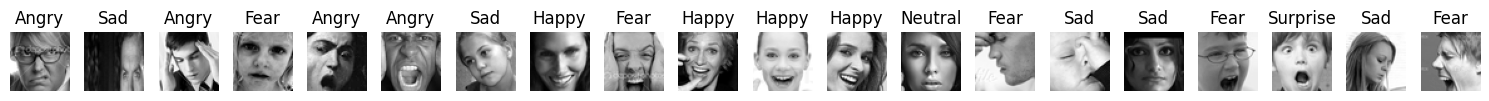

In [98]:
plt.figure(figsize=(15, 23))
for i in range(20):
    img = np.squeeze(X_test[i])  # Squeeze to remove any extra dimensions
    plt.subplot(1, 20, i + 1)
    plt.imshow(img, cmap='gray')  # Ensure grayscale display
    label = y_pred_classes[i]  # Since y_train has integer values like 3 (not one-hot encoded)
    plt.title(emotion_mapping[label])  # Map the integer label to emotion
    plt.axis('off')  # Turn off axis numbers
plt.tight_layout()
plt.show()

In [102]:
#using resnet

from tensorflow.keras.applications import ResNet50

In [18]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Load MobileNetV2 model with a custom input shape (48, 48, 3)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Freeze the base model's layers to avoid training them
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Use GAP instead of Flatten to reduce parameters
x = Dense(64, activation='relu')(x)  # Reduced number of neurons
x = Dropout(0.5)(x)
outputs = Dense(7, activation='softmax')(x)  # Adjust output size based on your classes

# Create the final model
model = Model(inputs=base_model.input, outputs=outputs)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary (optional)
model.summary()
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 4: Adjust ImageDataGenerator for augmentation
train_datagen = ImageDataGenerator(
    width_shift_range=0.1, 
    height_shift_range=0.1, 
    horizontal_flip=True, 
    zoom_range=0.2,
    
)

valgen = ImageDataGenerator()
    

# Step 5: Use .flow() for numpy arrays (convert grayscale images to 3 channels)
# Assuming x_train, x_val, and y_train, y_val are numpy arrays

# Convert grayscale to 3 channels by repeating the grayscale data along the channel axis
x_train_rgb = np.repeat(X_train, 3, axis=-1)  # Grayscale to RGB (48, 48, 1) -> (48, 48, 3)
x_val_rgb = np.repeat(X_val, 3, axis=-1)      # Same for validation set
y_train_one_hot = to_categorical(y_train, num_classes=7)  # Assuming you have 7 emotion classes
y_val_one_hot = to_categorical(y_val, num_classes=7)

# Create the generators
train_generator = train_datagen.flow(
    x_train_rgb, y_train_one_hot,
    batch_size=80
)

validation_generator = valgen.flow(
    x_val_rgb, y_val_one_hot,
    batch_size=80
)

# Train the model
model.fit(
    train_generator,
    steps_per_epoch=len(x_train_rgb) // 32,
    validation_data=validation_generator,
    validation_steps=len(x_val_rgb) // 32,
    epochs=10
)


C:\Users\HP PC\AppData\Local\Temp\ipykernel_7864\3542568976.py:6: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(48, 48, 3))


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)    │ (None, 48, 48, 3)         │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 24, 24, 32)        │             864 │ input_layer_2[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 24, 24, 32)        │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 24, 24, 32)        │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 24, 24, 32)        │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 24, 24, 32)        │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 24, 24, 32)        │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 24, 24, 16)        │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 24, 24, 16)        │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 24, 24, 96)        │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 24, 24, 96)        │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 24, 24, 96)        │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 25, 25, 96)        │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 12, 12, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 2,340,423 (8.93 MB)

 Trainable params: 82,439 (322.03 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/10
908/908 ━━━━━━━━━━━━━━━━━━━━ 94s 64ms/step - accuracy: 0.2327 - loss: 1.8912 - val_accuracy: 0.2464 - val_loss: 1.7963
Epoch 2/10
908/908 ━━━━━━━━━━━━━━━━━━━━ 63s 67ms/step - accuracy: 0.2534 - loss: 1.8163 - val_accuracy: 0.2492 - val_loss: 1.7851
Epoch 3/10
908/908 ━━━━━━━━━━━━━━━━━━━━ 59s 64ms/step - accuracy: 0.2566 - loss: 1.8035 - val_accuracy: 0.2495 - val_loss: 1.7769
Epoch 4/10
908/908 ━━━━━━━━━━━━━━━━━━━━ 58s 63ms/step - accuracy: 0.2565 - loss: 1.7955 - val_accuracy: 0.2638 - val_loss: 1.7628
Epoch 5/10
908/908 ━━━━━━━━━━━━━━━━━━━━ 55s 60ms/step - accuracy: 0.2593 - loss: 1.7923 - val_accuracy: 0.2703 - val_loss: 1.7492
Epoch 6/10
908/908 ━━━━━━━━━━━━━━━━━━━━ 55s 60ms/step - accuracy: 0.2590 - loss: 1.7901 - val_accuracy: 0.2669 - val_loss: 1.7556
Epoch 7/10
908/908 ━━━━━━━━━━━━━━━━━━━━ 57s 62ms/step - accuracy: 0.2563 - loss: 1.7876 - val_accuracy: 0.2774 - val_loss: 1.7610
Epoch 8/10
908/908 ━━━━━━━━━━━━━━━━━━━━ 62s 67ms/step - accuracy: 0.2618 - loss: 1.7790 - 

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

# Load the VGG16 model with pre-trained ImageNet weights
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Add custom layers on top of the VGG16 base model
x = base_model.output
x = Flatten()(x)  # Flatten the output
x = Dense(128, activation='relu')(x)  # Fully connected layer
x = Dense(7, activation='softmax')(x)  # Output layer for 7 classes in FER 2013

# Create the final model
model = Model(inputs=base_model.input, outputs=x)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 4: Adjust ImageDataGenerator for augmentation
train_datagen = ImageDataGenerator(
    width_shift_range=0.1, 
    height_shift_range=0.1, 
    horizontal_flip=True, 
    zoom_range=0.2,
    
)

valgen = ImageDataGenerator()
    

# Step 5: Use .flow() for numpy arrays (convert grayscale images to 3 channels)
# Assuming x_train, x_val, and y_train, y_val are numpy arrays

# Convert grayscale to 3 channels by repeating the grayscale data along the channel axis
x_train_rgb = np.repeat(X_train, 3, axis=-1)  # Grayscale to RGB (48, 48, 1) -> (48, 48, 3)
x_val_rgb = np.repeat(X_val, 3, axis=-1)      # Same for validation set
y_train_one_hot = to_categorical(y_train, num_classes=7)  # Assuming you have 7 emotion classes
y_val_one_hot = to_categorical(y_val, num_classes=7)

# Create the generators
train_generator = train_datagen.flow(
    x_train_rgb, y_train_one_hot,
    batch_size=80
)

validation_generator = valgen.flow(
    x_val_rgb, y_val_one_hot,
    batch_size=80
)

# Train the model
model.fit(
    train_generator,
    steps_per_epoch=len(x_train_rgb) // 32,
    validation_data=validation_generator,
    validation_steps=len(x_val_rgb) // 32,
    epochs=10
)


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 17s 0us/step
Epoch 1/10
110/908 ━━━━━━━━━━━━━━━━━━━━ 11:31 867ms/step - accuracy: 0.2193 - loss: 10.2129

KeyboardInterrupt: 